# Instacart Recommendation System: Data Wrangling and Exploratory Data Analysis

## Notebook by Lauren Dellon

Note: The data used in this notebook and subsequent notebooks is taken from a Kaggle competition called 'Instacart Market Basket Analysis'. The overview and data can be found here: https://www.kaggle.com/c/instacart-market-basket-analysis/overview

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from library.sb_utils import save_file

## Read files

In [2]:
aisles = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [31]:
aisles.shape

(134, 2)

There are a total of 134 aisles.

In [3]:
departments = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [32]:
departments.shape

(21, 2)

There are a total of 21 departments.

In [29]:
products = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [30]:
products.shape

(49688, 4)

There are a total of 49,688 products.

In [5]:
orders = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [33]:
orders.shape

(3421083, 7)

There are a total of 3,421,083 orders.

In [6]:
order_products_prior = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/order_products__prior.csv')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order_products_train = pd.read_csv('/Users/laurendellon/Documents/Springboard/Capstone_3_Docs/order_products__train.csv')
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


## Merge products with aisles and departments

In [8]:
products_merged = pd.merge(products, aisles, on='aisle_id')
products_merged = pd.merge(products_merged, departments, on='department_id')
products_merged.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks


## Which aisles have the most products?

Text(0.5, 1.0, 'Aisles with Most Products')

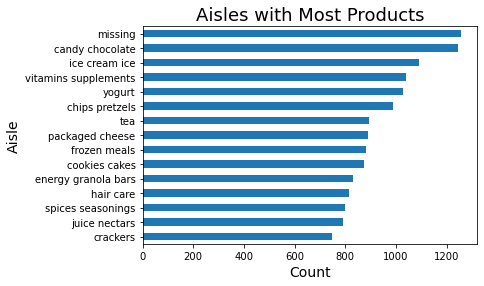

In [9]:
top_aisles = pd.DataFrame(products_merged['aisle'].value_counts().nlargest(15))
top_aisles = top_aisles.rename(columns={'aisle':'count'})
top_aisles['aisle'] = top_aisles.index
top_aisles = top_aisles.reset_index(drop=True)
top_aisles = top_aisles.sort_values(by=['count'])
ax = top_aisles.plot.barh(x='aisle',y='count',legend=False)
ax.set_xlabel('Count',fontsize=14)
ax.set_ylabel('Aisle',fontsize=14)
ax.set_title('Aisles with Most Products',fontsize=18)

## What departments have the most products?

Text(0.5, 1.0, 'Departments with Most Products')

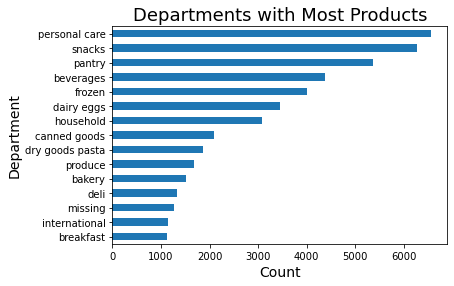

In [10]:
top_departments = pd.DataFrame(products_merged['department'].value_counts().nlargest(15))
top_departments = top_departments.rename(columns={'department':'count'})
top_departments['department'] = top_departments.index
top_departments = top_departments.reset_index(drop=True)
top_departments = top_departments.sort_values(by=['count'])
ax = top_departments.plot.barh(x='department',y='count',legend=False)
ax.set_xlabel('Count',fontsize=14)
ax.set_ylabel('Department',fontsize=14)
ax.set_title('Departments with Most Products',fontsize=18)

## What days of the week were most orders made?

In [11]:
orders['order_dow'].unique()

array([2, 3, 4, 1, 5, 0, 6])

In [12]:
s = pd.DataFrame(orders['order_dow'].value_counts())
s

,order_dow
0,600905
1,587478
2,467260
5,453368
6,448761
3,436972
4,426339


Text(0.5, 1.0, 'Most Popular Days')

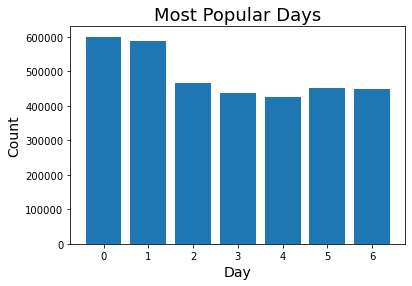

In [13]:
s['day'] = s.index
s = s.sort_values('day')
s = s.rename({'order_dow':'count'},axis=1)
plt.bar(s['day'],s['count'])
plt.xlabel('Day',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Most Popular Days',fontsize=18)

Days 0 and 1 are the most popular days to order. These are most likely Saturday and Sunday, as people are probably more likely to order on the weekend.

## What hours of the day were most orders made?

Text(0.5, 1.0, 'Most Popular Hours')

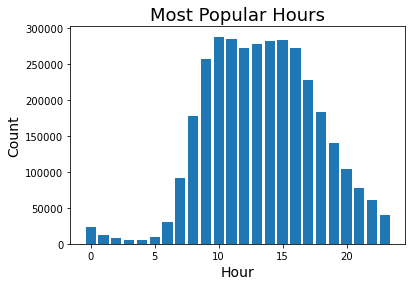

In [14]:
s = pd.DataFrame(orders['order_hour_of_day'].value_counts())
s['hour'] = s.index
s = s.sort_values('hour')
s = s.rename({'order_hour_of_day':'count'},axis=1)
plt.bar(s['hour'],s['count'])
plt.xlabel('Hour',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Most Popular Hours',fontsize=18)

## Days Since Prior Order

Text(0.5, 1.0, 'Days Since Prior Order')

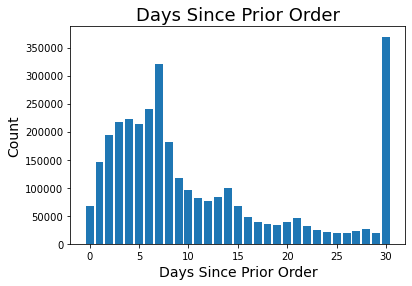

In [15]:
s = pd.DataFrame(orders['days_since_prior_order'].value_counts())
s = s.rename({'days_since_prior_order':'count'},axis=1)
s['days since prior order'] = s.index
s = s.sort_values('days since prior order')
plt.bar(s['days since prior order'],s['count'])
plt.xlabel('Days Since Prior Order',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Days Since Prior Order',fontsize=18)

The majority of days since prior order is 30. This is most likely due to any number of days over 30 being assigned to the 30 category. It also looks like there may be many customers who order weekly, as the bars for 7, 14, and 21 days are local maxima. 

## Merge order_products_prior with products_merged

In [16]:
order_products_merged = pd.merge(order_products_prior, products_merged, on='product_id')
order_products_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs


## What are the most popular products?

Text(0.5, 1.0, 'Most Popular Products')

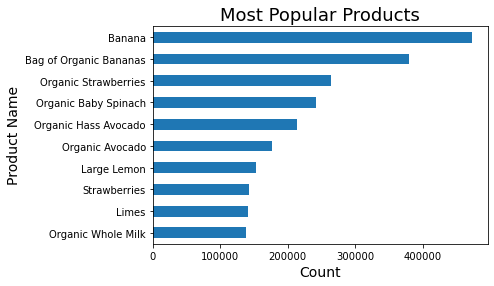

In [17]:
pop_products = pd.DataFrame(order_products_merged['product_name'].value_counts().nlargest(10))
pop_products = pop_products.rename(columns={'product_name':'count'})
pop_products['product_name'] = pop_products.index
pop_products = pop_products.reset_index(drop=True)
pop_products = pop_products.sort_values(by=['count'])
ax = pop_products.plot.barh(x='product_name',y='count',legend=False)
ax.set_xlabel('Count',fontsize=14)
ax.set_ylabel('Product Name',fontsize=14)
ax.set_title('Most Popular Products',fontsize=18)

Interestingly, the most popular products are fruits and vegetables, mostly organic. 

## What are the most popular aisles?

Text(0.5, 1.0, 'Most Popular Aisles')

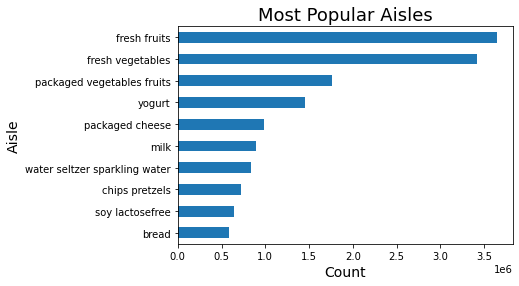

In [18]:
pop_aisles = pd.DataFrame(order_products_merged['aisle'].value_counts().nlargest(10))
pop_aisles = pop_aisles.rename(columns={'aisle':'count'})
pop_aisles['aisle'] = pop_aisles.index
pop_aisles = pop_aisles.reset_index(drop=True)
pop_aisles = pop_aisles.sort_values(by=['count'])
ax = pop_aisles.plot.barh(x='aisle',y='count',legend=False)
ax.set_xlabel('Count',fontsize=14)
ax.set_ylabel('Aisle',fontsize=14)
ax.set_title('Most Popular Aisles',fontsize=18)

## What are the most popular departments?

Text(0.5, 1.0, 'Most Popular Departments')

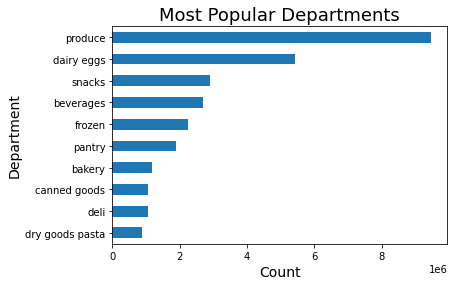

In [19]:
pop_departments = pd.DataFrame(order_products_merged['department'].value_counts().nlargest(10))
pop_departments = pop_departments.rename(columns={'department':'count'})
pop_departments['department'] = pop_departments.index
pop_departments = pop_departments.reset_index(drop=True)
pop_departments = pop_departments.sort_values(by=['count'])
ax = pop_departments.plot.barh(x='department',y='count',legend=False)
ax.set_xlabel('Count',fontsize=14)
ax.set_ylabel('Department',fontsize=14)
ax.set_title('Most Popular Departments',fontsize=18)